Dataset Description :

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Analysis Tasks

Basic Statistics tasks

1) Which store has maximum sales

2) Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

3) Which store/s has good quarterly growth rate in Q3’2012

4) Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

5) Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Walmart_store_sales.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


<AxesSubplot:xlabel='Store'>

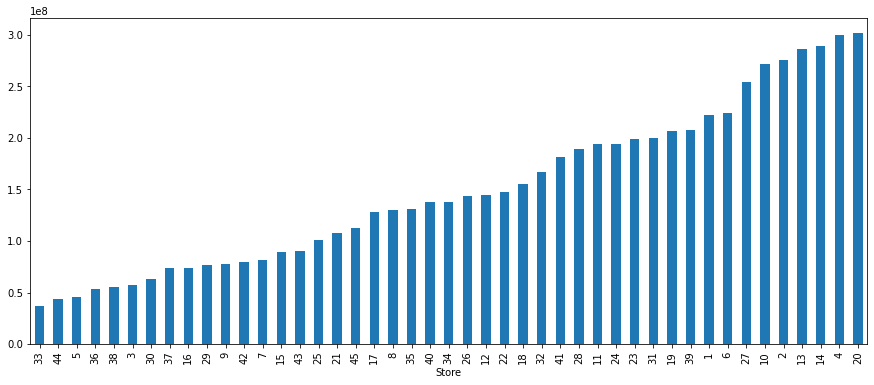

In [4]:
a=df.groupby('Store')['Weekly_Sales'].sum().sort_values()
a_array=np.array(a)
plt.figure(figsize=(15,6))
a.plot(kind='bar')

In [5]:
df.groupby('Store')['Weekly_Sales'].std().sort_values()

Store
37     21837.461190
30     22809.665590
33     24132.927322
44     24762.832015
5      37737.965745
43     40598.413260
38     42768.169450
3      46319.631557
42     50262.925530
36     60725.173579
9      69028.666585
16     85769.680133
29     99120.136596
34    104630.164676
8     106280.829881
26    110431.288141
17    112162.936087
7     112585.469220
25    112976.788600
40    119002.112858
15    120538.652043
31    125855.942933
21    128752.812853
45    130168.526635
32    138017.252087
12    139166.871880
1     155980.767761
22    161251.350631
11    165833.887863
24    167745.677567
18    176641.510839
28    181758.967539
41    187907.162766
19    191722.638730
35    211243.457791
6     212525.855862
39    217466.454833
2     237683.694682
27    239930.135688
23    249788.038068
13    265506.995776
4     266201.442297
20    275900.562742
10    302262.062504
14    317569.949476
Name: Weekly_Sales, dtype: float64

In [6]:
from datetime import datetime

In [7]:
df["Day"]= pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Year'] = pd.DatetimeIndex(df['Date']).year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

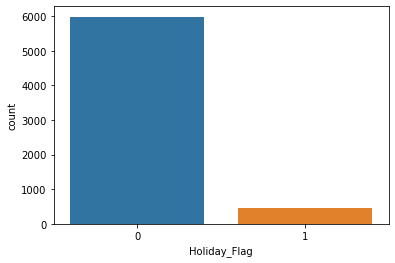

In [8]:
sns.countplot(x="Holiday_Flag",data=df)

<AxesSubplot:xlabel='Year'>

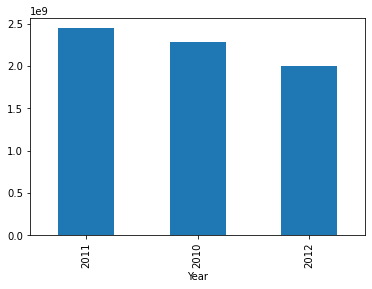

In [9]:
df.groupby(['Year'])['Weekly_Sales'].sum().sort_values(ascending=False).plot(kind='bar')

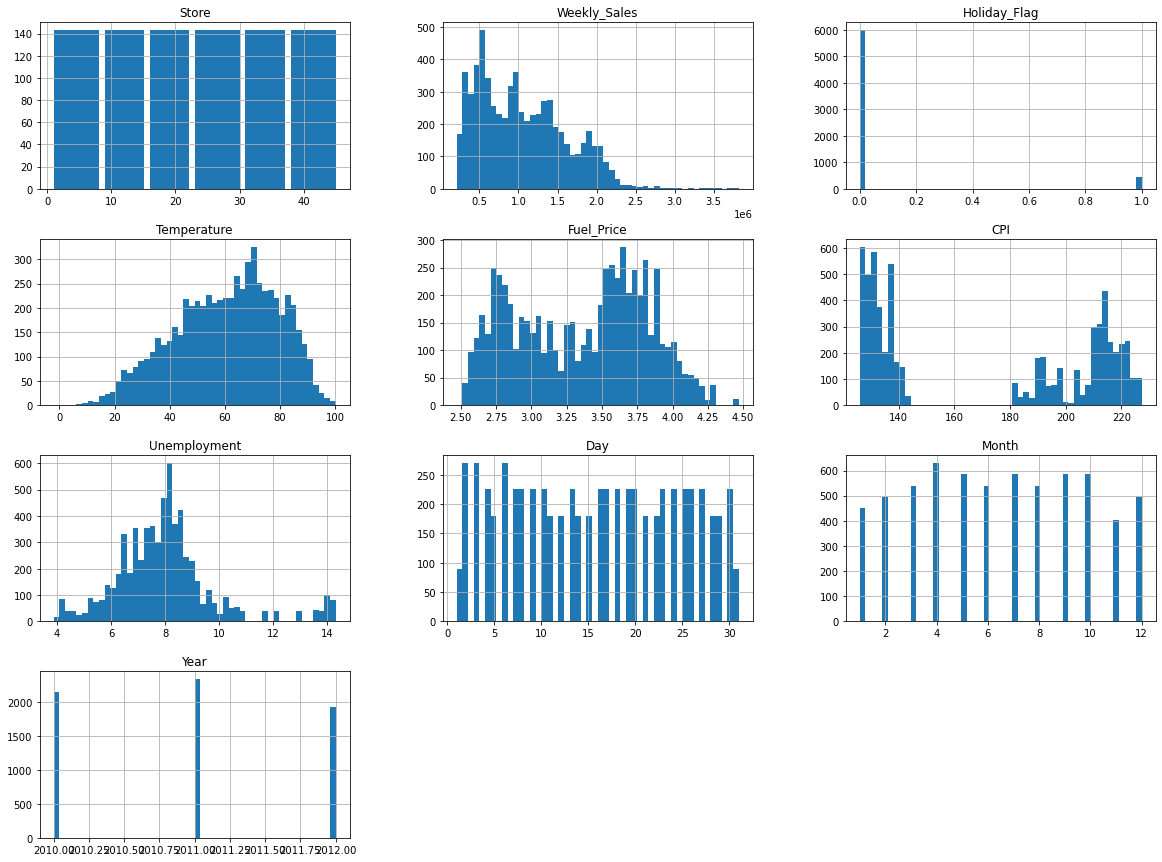

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,-1.070464e-15,6.289676e-16,3.474318e-12
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-1.487292e-02,6.753523e-02,-1.837754e-02
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-3.603594e-02,3.322341e-01,-5.678257e-02
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,8.901925e-02,6.643970e-02,6.426923e-02
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,3.253169e-02,-5.283174e-02,7.794703e-01
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,3.965821e-03,1.478843e-03,7.479573e-02
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-8.166853e-03,-2.061552e-03,-2.418135e-01
Day,-1.070464e-15,-0.014873,-3.603594e-02,0.089019,0.032532,0.003966,-0.008167,1.000000e+00,5.959249e-03,-1.277942e-02
Month,6.289676e-16,0.067535,3.322341e-01,0.066440,-0.052832,0.001479,-0.002062,5.959249e-03,1.000000e+00,-1.390145e-01
Year,3.474318e-12,-0.018378,-5.678257e-02,0.064269,0.779470,0.074796,-0.241813,-1.277942e-02,-1.390145e-01,1.000000e+00


<AxesSubplot:>

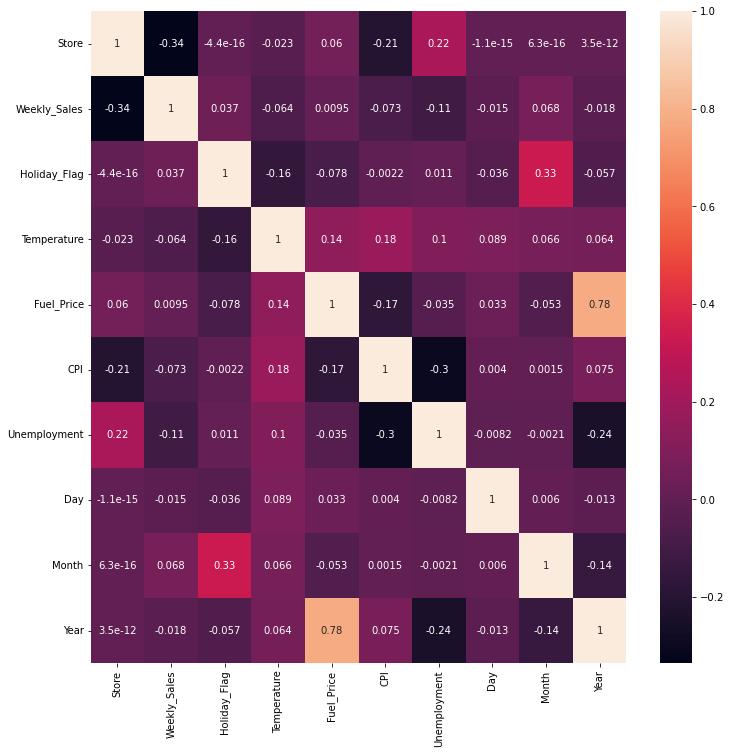

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df[['CPI','Unemployment','Fuel_Price','Day','Month','Year','Store']]
y=df['Weekly_Sales']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

In [19]:
Predictions=lm.predict(X_test)

In [20]:
from sklearn import metrics

In [22]:
print('Accuracy:',lm.score(X_test, y_test)*100)

Accuracy: 13.752148339787096


In [23]:
metrics.mean_absolute_error(y_test,Predictions)

429007.3596334121

In [24]:
metrics.mean_squared_error(y_test,Predictions)

271102289352.67303

In [25]:
np.sqrt(metrics.mean_squared_error(y_test,Predictions))

520674.84033000196

Random Forest Regressor:

Accuracy: 93.16095592281222
Mean Absolute Error: 429007.3596334121
Mean Squared Error: 271102289352.67303
Root Mean Squared Error: 520674.84033000196


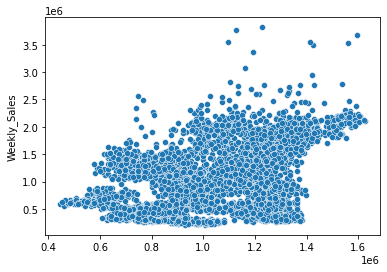

In [31]:
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Predictions)))
sns.scatterplot(Predictions, y_test)


import warnings
warnings.filterwarnings('ignore')